<center><h1>Battle of Neighbourhoods; Finding Best Pivot Place For Cab Drivers in Berlin</h1>
<br>
<img src = 'https://www.bz-berlin.de/data/uploads/2019/04/ermany2013_1554899772.jpg' width = 800>
</center>


<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 4>

1.INTRODUCTION: BUSINESS PROBLEM
    
 <a href="#item1"> Problem Description</a>

2.DATA
    
 <a href="#item1"> Data Sources/Web Scraping</a>
    
 <a href="#item2"> Data Wrangling </a>
    
 <a href="#item3"> Implementation and Exploration </a> 

3.METHODOLOGY
    
  <a href="#item4">General Methodology</a>
    
 <a href="#item5">Analyze Data Set/ Zipcodes in Berlin</a>

 <a href="#item6">Preprocessing Venues</a>  
   
 <a href="#item6">Machine Learning/ Clustering Zipcodes</a>
   
4.RESULTS 
    
  <a href="#item7">Examine Clusters</a>  
   
  <a href="#item8">Explore Top Rated Venues</a>   
    
5.DISCUSSION
    
  <a href="#item8">Recommendations</a>  
    
6.CONCLUSION
    
  <a href="#item8">Conclusion of the Project</a>  
    
</font>
</div>

<a id="ref0"></a>
<h1>1. INTRODUCTION: BUSINESS PROBLEM</h1>

<p style="text-align:justify">
    Berlin is the capital city of the Federal Republic of Germany. According to 2017 census data this city has approximately 3.65 million inhabitants and as far as population concerned Berlin is the biggest city in Germany. Berlin is evidently a metropole and moreover it is an overwhelming, fascinating and a growing city. Until 2030, the population of Berlin is supposed to grow around 7.5%, predominantly because of increasing migration. 
</p>
<p style="text-align:justify">
    Among the major sectors in Berlin include the tourism, the creative and cultural industries, the biotechnology and healthcare industry with medical and pharmaceutical industries, information and communication technologies, the construction and property industry, trade, optoelectronics, energy technology and Trade fair and congress industry. The city is a European hub of rail and air traffic. Berlin is one of the emerging international centers for innovative business start-ups, with high annual growth in the number of employed people. 
</p>
<p style="text-align:justify">
    Let’s think about a person who wants to dive in to taxi business in Berlin. He wants to work as a cab driver in Berlin. Since he has a limited budget, his goal is profit maximization. Because of high mobility and better standards compared to conventional taxi business, he wants to work under the organisation of ‘UBER’ or being a member of ‘MyTaxi’ organisation. We can call our friend from now on an unconventional cab driver in order to differentiate him from normal taxi drivers who are not directed from a center and generally have yellow taxis. ‘UBER’ is one of the legal and valid organisations in Germany in taxi business. Although it is sometimes controversial and prone to some limitations because of conventional taxi driver’s protest, UBER is generally available both in Germany and Berlin. Companies like MyTaxi are also providing similar service in Berlin.
</p>
<p style="text-align:justify">
    In a routine day, as part of their routine life, many people commute in Berlin. The season (sommer, winter etc), the day type (weekday or weekend) and even the time period of the day (morning, noon, afternoon, night) has great effect on the total number of German people commuting in Berlin and their movement patterns respectively. We can talk about trends when people commute in such a metropole. Biggest people movement is always observed to be mainly from accommodation places to respective working places and vice versa. And also from working place to recreation areas or venues. Weekend periods are always exceptions. People don’t work at weekends; they rest instead, and try to enjoy their free times. Therefore, they move from their respective homes to recreation areas or to possible venues available for spending time and vice versa. Sommer period is also a different case . In particular, for a touristic place like Berlin.
</p>
<p style="text-align:justify">
    Both Uber and MyTaxi work on internet based applications (over cell phone or tablet) and these applications function based on the logic of finding the closest cab driver available for any client or passenger. When someone registered to one of this companies as a cab driver; first the application is installed and then the calls for cab comes from clients over this application. And it is so evident that mobility of people influences the possibility of finding client. If a cab driver is in the right place, he can easily find a client and earn money.
</p>
<p style="text-align:justify">
    For a person working as a non-conventional cap driver minimizing the costs and maximizing the revenues is definitely the main goal. And being in the right place in the right time is the key to success in this business. A cab driver must find more clients in order to maximize the revenues and must be close to the best client source areas. We can call them live areas where people are. A cab driver can maximize profits by staying within a certain distance of the most live venues or recreation areas. Moreover, a predetermined center or pivot point that a cab driver has to return after each trip with client is quite logical to find more clients. Finding the best pivot neighbourhood for cab drivers will really help this labor group. This pivot area can basically be defined as the area with biggest number of venues such as restaurants, cinemas, theatres, hotels, museums, parks, working places etc. Because venues are serving people.
</p>
<p style="text-align:justify">
    There may of course be other factors in effect such as the number of people living in this neighbourhood and the number of people working there. Moreover, public transportation service availability is also a factor for the revenues of non-conventional cab drivers. But in general one can state that people around venues need cabs to move to different places. We have an optimisation problem at hand and in order to find the best borough or neighbourhood for any cab driver as a pivot area to turn around, we need to segment and cluster the city of Berlin based on Foursquare API data. In addition, in order to find best client source, we need to find the top rated venues and calculate the total number of venues in each cluster.
</p>
<p style="text-align:justify">
There are 12 boroughs (Charlottenburg-Wilmersdorf, Friedrichshain-Kreuzberg, Lichtenberg, Marzahn-Hellersdorf,Mitte, Neukölln, Pankow, Reinickendorf, Spandau, Steglitz-Zehlendorf, Tempelhof-Schöneberg, Treptow-Köpenick) and 96 neighbourhoods in city of Berlin. Determining the right area (borough or neighbourhood) is our goal and we will use a Machine Learning algorithm to segment and cluster the neighbourhoods. Finally, we will make a recommendation to our cab drivers as a solution to their pivot area finding problem.
</p>

<p style="text-align:justify">
<a id="ref0b"></a>
<h2>2. DATA</h2>
   <h2> a. Data Sources/ Web Scraping</h2>

   Due to difficulty of working in neighbourhood level in such a metropole, insignificance of finding a pivot solution for a taxi based on neighbourhoods and unavailability of some portion of neighbourhood level data for Berlin; segmenting and clustering analysis in this study is performed on BOROUGH level. Coordinates of borough zipcodes are used to find number of venues within a defined area. Venue requests are made based on borough information and mainly following data sources are used. The location data consists of the boroughs, their zipcodes, and coordinates . I have scraped that data from 2 web pages (http://www.statistik-berlin-brandenburg.de/produkte/verzeichnisse/zuordnungderbezirkezupostleitzahlen.xls and https://raw.githubusercontent.com/TrustChainEG/postal-codes-json-xml-csv/master/data/DE/zipcodes.de.csv)and acquired necessary info. Zipcodes served as the index and refer to coordinates, borough names, etc. And I used location data in Github to describe the shape and centers of the boroughs as it is in geojson format(https://raw.githubusercontent.com/m-hoerz/berlin-shapes/master/berliner-bezirke.geojson).  
</p>
<h2>   b. Data Wrangling </h2>

   After some data processing and wrangling I had below data format. All of these processess will be explained later. 
    
   #### ZipCode/  State/    Latitude/  Longitude/  Borough/ 
   #### 10115  /  Berlin/   52.5323/   13.3846 /   Mitte/

   Later, I created a map of Berlin with all boroughs and zipcodes of all neighbourhoods superimposed on them by using folio.This data is combined with Foursquare API data. I explored the areas around the collected zipcodes(postal codes)
in Berlin. Therewith, I perform location search and gather the most famous venues within a circle of 1500 meters radius for each zipcode. By doing so I will try to cover almost all areas within a specific borough. Four square data looked like below. As a result, I got 13600 total venues and 373 unique categories in the data set. 
    
   #### ZipCode/  Zipcode Latitude/  Zipcode Longitude/ Venue      /	Venue Latitude/	Venue Longitude/ Venue Category/ 
   #### 14119/    52.4777        /   3.2951           / Erlenbush  /   52.46433      /	13.303959      / Park /

   The parameters “radius” and “number of venues” are reasonable choices for finding number of venues within all boroughs. Yelp API provides data concerning top-rated venues at given coordinates. This information might interest cab drivers since those venues are place of attractions for cab clients. Further, to obtain a systematic view on the structure of the boroughs, a cluster analysis facilitated a comparison of the locations. Therefore, the venues and their categories were collected at each zipcode in order to compare the relative frequencies of venues per category at each zipcode. 
</p>
   These frequencies of venues per category, called "category feature" serve as a measurement of dissimilarity of 
distinct locations. The cluster analysis groups locations with similar "category features" into a cluster and separates locations with more diverse features. 
</p>

   #### ZipCode/ATM/Adult Butique/African Restaurant/Airport Service/American Restaurant/Animal Shelter/Antique Shop/Aquarim/Argentinian Restaurant/Vietnamese Restaurant/Volleyball Court/Waterfront/Whisky Bar/Wine Bar/Wine Shop/Winery/Women's Store/Yoga Studio/Zoo Exhibit/    
   #### 10115/0.00/0.00/0.00/0.00/0.00/0.00/0.00/0.00/0.00/0.020000/0.02/0.0/0.0/0.020000/0.00/0.0/0.0/0.00/0.0/

   A dendrogram shows the distances between the "category features" in order to determine the number of clusters. Therewith, a hierarchical cluster algorithm provides the cluster labels for the zipcodes. These derivers cluster of similar locations within boroughs of Berlin.
</p>
<h2> c. Implementation and Exploration</h2>

At this step of the Project we`ll try to implement and explore our data.
First we´ll import necesstary libraries and modelues.

In [2]:
# importing libraries
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from bs4 import BeautifulSoup
import requests # library to handle requests
import urllib.request
from urllib.parse import quote # handle irregular strings
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
import geopy.geocoders # convert an address into latitude and longitude values


#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter

# import k-means from clustering stage
from sklearn.cluster import KMeans

# supporting libaries
import csv
import shutil
from IPython.display import display, HTML, Image

print('Libraries are imported.')

Libraries are imported.


The Zipcodes in our data are the main indexes for the project and the data refers to. If multiple boroughs contain the same zipcode, the first linkage between a borough an a zipcode retains and the remaining ones dropped or deleted. For deleted zipcode see the comment '#' in each line.

Since Berlin is a huge city and there are so many data as far as venues concerned and for the sake of simplicity, I choosed to work with the borough level and did not made an effort to convert all zipcodes to neighborgoods. On the other hand Postal coding system in Germany is to some content different from other countries. There are 96 official neighborhoods in Berlin but 190 zipcode in our dataset. This means that some neighborhoods have more than one zipcode.      

In [3]:
Berlin_Borough = {
'Mitte': [13347, 13355, 13357, 13359, 13409, 10555, 10557, 10551, 10553, 10555, 10557, 10559, 13353, 10115, 10117, 10119, 10178, 10179, 10551, 10553, 10555, 10557, 10559, 10785, 10787, 10963, 13353, 13347, 13349, 13351, 13353, 13355, 13357, 13359, 13405, 13407, 13409],
'Friedrichshain-Kreuzberg': [10243, 10245, 10247, 10249, 10367, 10961, 10965, 10967, 10997, 10999, 12045],# 10179, 10785, 10963, 10969
'Pankow': [10405, 10407, 10409, 10437, 10439, 13051, 13053, 13086, 13088, 13089, 13125, 13127, 13129, 13156, 13158, 13159, 13187, 13189], #10119, 10247, 10249, 10435
'Charlottenburg-Wilmersdorf': [10585, 10587, 10589, 10625, 10627, 10629, 10707, 10709, 10711, 10713, 10715, 10717, 10719, 10777, 10779, 10789, 10825, 13597, 13627, 13629, 14050, 14052, 14053, 14055, 14057, 14059, 14193, 14195, 14197, 14199], #10553, 10623, 10787, 13353
'Spandau': [13581, 13583, 13585, 13587, 13589, 13591, 13593, 13595, 13599, 14089],# 13597, 13627, 13629, 14052
'Steglitz-Zehlendorf': [12157, 12161, 12163, 12165, 12167, 12169, 12203, 12205, 12207, 12209, 12247, 12249, 12277, 12279, 14109, 14129, 14163, 14165, 14167, 14169],#14193, 14195, 14197, 14199
'Tempelhof-Schöneberg': [10781, 10783, 10823, 10827, 10829, 12099, 12101, 12103, 12105, 12107, 12109, 12159, 12305, 12307, 12309, 12347],#10777, 10779, 10789, 10825, 10965, 12157, 12161, 12163, 12169, 10785, 10787, 12249, 12277, 12279, 14197
'Neukölln': [12043, 12047, 12049, 12051, 12053, 12055, 12057, 12059, 12349, 12351, 12353, 12355, 12357, 12359], #10967, 12045, 12099, 12107, 10965, 12305, 12347
'Treptow-Köpenick': [12435, 12437, 12439, 12459, 12487, 12489, 12524, 12526, 12527, 12555, 12557, 12559, 12587, 12589, 12623],
'Marzahn-Hellersdorf': [12619, 12621, 12627, 12629, 12679, 12681, 12683, 12685, 12687, 12689],#12555, 12623
'Lichtenberg': [10315, 10317, 10318, 10319, 10365, 10369, 13055, 13057, 13059], #10367, 13051, 13053
'Reinickendorf': [13403, 13435, 13437, 13439, 13465, 13467, 13469, 13503, 13505, 13507, 13509],#13405, 13407, 13409, 13599, 13629
}

Now let´s Swap the format, change borough-zipcode into zipcode-borough format and try to locate duplicate zipcodes existing in different boroughs in the dataset.

In [4]:
Zip, Bor = [], []
for k,vals in Berlin_Borough.items():
    #print (k,vals)
    for v in vals:
        Zip.append( v)
        Bor.append( k)
    
Berlin_Borough = pd.DataFrame( {'Zipcode':Zip, 'Borough': Bor} )
Berlin_Borough.to_pickle('./Berlin_Borough.pkl')

Duplett = Berlin_Borough.groupby(by='Zipcode', as_index=False).count()
print ('Multiple identical pairs of zips and boroughs  - duplicate copys:')
display ( Duplett[Duplett['Borough']>=2] )

Multiple identical pairs of zips and boroughs  - duplicate copys:


,Zipcode,Borough
21,10551,2
22,10553,2
23,10555,3
24,10557,3
25,10559,2
137,13347,2
140,13353,3
141,13355,2
142,13357,2
143,13359,2


The following data source provides the central coordinates for zipcodes (see: http://www.geonames.org/postal-codes/DE/BE/berlin.html, I use the Github):

In [5]:
Berlin_Coordinate = pd.read_csv('https://raw.githubusercontent.com/TrustChainEG/postal-codes-json-xml-csv/master/data/DE/zipcodes.de.csv')
Berlin_Coordinate.to_pickle('./Germany_Zipcodes.pkl')
Berlin_Coordinate.head()

,country_code,zipcode,place,state,state_code,province,province_code,community,community_code,latitude,longitude
0,DE,1945,Grünewald,Brandenburg,BB,NaN,0,Landkreis Oberspreewald-Lausitz,12066,51.4000,14.0000
1,DE,1945,Lindenau,Brandenburg,BB,NaN,0,Landkreis Oberspreewald-Lausitz,12066,51.4000,13.7333
2,DE,1945,Hohenbocka,Brandenburg,BB,NaN,0,Landkreis Oberspreewald-Lausitz,12066,51.4310,14.0098
3,DE,1945,Schwarzbach,Brandenburg,BB,NaN,0,Landkreis Oberspreewald-Lausitz,12066,51.4500,13.9333
4,DE,1945,Guteborn,Brandenburg,BB,NaN,0,Landkreis Oberspreewald-Lausitz,12066,51.4167,13.9333


The following transformations filter data, extract relevant columns and rows, and joins DataFrames:

In [6]:
Berlin_Coordinate = pd.read_pickle('./Germany_Zipcodes.pkl')
Berlin_Borough = pd.read_pickle('./Berlin_Borough.pkl')

Berlin_Coordinate.drop( columns=['country_code','place','province','province_code','state_code','community','community_code'], inplace=True) # drop unrelevant columns
Berlin_Coordinate = Berlin_Coordinate [ (Berlin_Coordinate['zipcode']>=10115) & (Berlin_Coordinate['zipcode']<=14199) ] # drop unrelevant zipcodes in rows: https://en.wikipedia.org/wiki/List_of_postal_codes_in_Germany#Berlin
Berlin_Coordinate.dropna(axis=0, inplace=True) # drop rows with missing values

Berlin_mapped = Berlin_Coordinate.join( Berlin_Borough.set_index('Zipcode'), on='zipcode', how='inner', sort=True)
Berlin_mapped.reset_index(drop = True, inplace = True)
Berlin_mapped.to_pickle('./Berlin_Zipcodes.pkl')
Berlin_mapped.head(10)

,zipcode,state,latitude,longitude,Borough
0,10115,Berlin,52.5323,13.3846,Mitte
1,10117,Berlin,52.5170,13.3872,Mitte
2,10119,Berlin,52.5305,13.4053,Mitte
3,10178,Berlin,52.5213,13.4096,Mitte
4,10179,Berlin,52.5122,13.4164,Mitte
5,10243,Berlin,52.5123,13.4394,Friedrichshain-Kreuzberg
6,10245,Berlin,52.5007,13.4647,Friedrichshain-Kreuzberg
7,10247,Berlin,52.5161,13.4656,Friedrichshain-Kreuzberg
8,10249,Berlin,52.5238,13.4428,Friedrichshain-Kreuzberg
9,10315,Berlin,52.5132,13.5148,Lichtenberg


Lets execute some descriptive statistics for plausibility checks.

In [7]:
Berlin_mapped = pd.read_pickle('./Berlin_Zipcodes.pkl')
Berlin_mapped.describe(include='all')

,zipcode,state,latitude,longitude,Borough
count,201.000000,201,201.000000,201.000000,201
unique,NaN,1,NaN,NaN,12
top,NaN,Berlin,NaN,NaN,Mitte
freq,NaN,201,NaN,NaN,37
mean,12220.721393,NaN,52.506793,13.385227,NaN
std,1254.834791,NaN,0.053505,0.107186,NaN
min,10115.000000,NaN,52.385600,13.140500,NaN
25%,10785.000000,NaN,52.470400,13.319500,NaN
50%,12355.000000,NaN,52.509500,13.371400,NaN
75%,13353.000000,NaN,52.541600,13.448600,NaN


The following geojson-file contains the limiting coordinates for the twelve boroughs:

In [8]:
url = 'https://raw.githubusercontent.com/m-hoerz/berlin-shapes/master/berliner-bezirke.geojson'

# save geojson-file in working directory
with urllib.request.urlopen(url) as response, open('berliner-bezirke.geojson', 'wb') as Borough_Json:
    shutil.copyfileobj(response, Borough_Json)

Now lets find the geographical coordinates of Berlin in our geojson-file.

In [9]:
# GEt coordinates of Berlin using Nominatim and geolocator
address = 'Berlin'

geolocator = Nominatim(user_agent="Berlin_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Berlin are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Berlin are 52.5170365, 13.3888599.


The geograpical coordinates of Berlin are Latitude: 52.5170365, Longitude : 13.3888599. Let`s draw a map of Berlin and highlight boroughs and their zipcodes.

In [10]:
Borough_Json = r'berliner-bezirke.geojson' # geojson file

# get coordinates of Berlin to center the map
location = Nominatim().geocode('Berlin, Germany') # as the center of the following map, convert the address of Toronto into latitude and longitude values

figM1 = plt.figure()

# plain map of Berlin
Map_Berlin = folium.Map(location=[location.latitude, location.longitude], zoom_start=10)

# use choropleth to highlight boroughs
Map_Berlin.choropleth(
    geo_data=Borough_Json,
    key_on='features.properties.spatial_alias', #  see geojson for path
    fill_color='yellow', 
    legend_name='Zipcodes and Boroughs in Berlin',
    highlight = True,
    line_color ='black'
)

# add markers to the map
markers_colors = []
for lat, lon, poi, bor in zip(
     Berlin_mapped['latitude'],
     Berlin_mapped['longitude'],
     Berlin_mapped['zipcode'],
     Berlin_mapped['Borough']
):
    label = folium.Popup('Borough: {}, Zipcode: {}'.format(bor, poi ) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7
    ).add_to(Map_Berlin)

''' OLD
folium.CircleMarker(
    location=[52.64, 13.71],
    radius=5,
    popup='Laurelhurst Park',
    color='#3186cc',
    fill=True,
    fill_color='yellow'
).add_to(Map_Berlin)
'''

Map_Berlin

<Figure size 432x288 with 0 Axes>

Now, lets initialize the Foursquare API to explore venues at the coordinates of zipcodes.

In [12]:
# Credentials are bind to my specific Foursquare app

CLIENT_ID = 'SYXM3SLRLLQAEFKJNMTOZLWWCO4M1ZX2YL0LDZYPTORZBEZJ' # your Foursquare ID
CLIENT_SECRET = 'OQE2NDTW5IGHBSOCFHMD2433FQRDEOIA15BQGBBQ2B41NO1W' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: SYXM3SLRLLQAEFKJNMTOZLWWCO4M1ZX2YL0LDZYPTORZBEZJ
CLIENT_SECRET:OQE2NDTW5IGHBSOCFHMD2433FQRDEOIA15BQGBBQ2B41NO1W


Now we use a function to collect the data at zipcodes with specific coordinates.

In [13]:
def get_nearby_venues(names, latitudes, longitudes, radius=1500):
    
    name_list = []
    lat_list = []
    lng_list = []
    venue_name_list = []
    venue_lat_list = []
    venue_lng_list = []
    venue_cat_list = []
    limit = 100
    print( 'Zipcode, Latitude, Longitude:' )
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        print( str(name) +', '+  str(lat) +', '+ str(lng) )
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # return only relevant information for each nearby venue
        # the structure is given by Foursquare
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
            for v in results:
                name_list.append( name )
                lat_list.append( lat )
                lng_list.append( lng )
                venue_name_list.append( v['venue']['name'] )
                venue_lat_list.append( v['venue']['location']['lat'] )
                venue_lng_list.append( v['venue']['location']['lng'] ) 
                venue_cat_list.append( v['venue']['categories'][0]['name'] )
                
        except:
            pass
    print('-------Requested all zipcodes--------')
    
    # build DataFrame with zipcode as key and the collected venues
    nearby_venues = pd.DataFrame( {
        'Zipcode': name_list, 
        'Zipcode Latitude': lat_list, 
        'Zipcode Longitude': lng_list, 
        'Venue': venue_name_list, 
        'Venue Latitude': venue_lat_list, 
        'Venue Longitude': venue_lng_list, 
        'Venue Category': venue_cat_list } )
    
    return(nearby_venues)

Apply the function to obtain up to 100 venues at each zipcode and extract the venue categories.

In [14]:
Berlin_Venues = get_nearby_venues( 
    Berlin_mapped.loc[:,'zipcode'],
    Berlin_mapped.loc[:,'latitude'],
    Berlin_mapped.loc[:,'longitude'],
    radius=1500)

#Berlin_Venues.to_pickle('./Berlin_Venues.pkl')
Berlin_Venues.head()

Zipcode, Latitude, Longitude:
10115, 52.5323, 13.3846
10117, 52.516999999999996, 13.3872
10119, 52.5305, 13.4053
10178, 52.5213, 13.4096
10179, 52.5122, 13.4164
10243, 52.5123, 13.4394
10245, 52.5007, 13.4647
10247, 52.5161, 13.4656
10249, 52.5238, 13.4428
10315, 52.5132, 13.5148
10317, 52.4979, 13.4908
10318, 52.4835, 13.5287
10319, 52.4992, 13.5188
10365, 52.5206, 13.4969
10367, 52.5246, 13.4821
10369, 52.5295, 13.4695
10405, 52.5352, 13.4257
10407, 52.5336, 13.4492
10409, 52.5443, 13.4414
10437, 52.5449, 13.4126
10439, 52.5522, 13.4121
10551, 52.5307, 13.3372
10551, 52.5307, 13.3372
10553, 52.5305, 13.3215
10553, 52.5305, 13.3215
10555, 52.5215, 13.3355
10555, 52.5215, 13.3355
10555, 52.5215, 13.3355
10557, 52.5233, 13.3594
10557, 52.5233, 13.3594
10557, 52.5233, 13.3594
10559, 52.5301, 13.3499
10559, 52.5301, 13.3499
10585, 52.5152, 13.3057
10587, 52.5184, 13.3195
10589, 52.5276, 13.3057
10625, 52.5095, 13.3147
10627, 52.508, 13.302999999999999
10629, 52.5028, 13.3086
10707, 52.496

,Zipcode,Zipcode Latitude,Zipcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,10115,52.5323,13.3846,Hotel i31,52.531107,13.384270,Hotel
1,10115,52.5323,13.3846,Oslo Kaffebar,52.531029,13.386889,Coffee Shop
2,10115,52.5323,13.3846,Brasserie La Bonne Franquette,52.531102,13.382489,Brasserie
3,10115,52.5323,13.3846,+84,52.532639,13.379511,Vegetarian / Vegan Restaurant
4,10115,52.5323,13.3846,19grams,52.533037,13.380054,Coffee Shop


Lets execute some descriptive statistics for the venues.

In [15]:
Berlin_Venues = pd.read_pickle('Berlin_Venues.pkl')
Berlin_Venues_grouped = Berlin_Venues.groupby('Zipcode').count()

print('There are {0} total venues, and {1} uniques categories.'.format( \
    Berlin_Venues_grouped['Venue'].sum(), len( Berlin_Venues['Venue Category'].unique()) ))
print ()
print('Some example venues in Berlin:')
display( Berlin_Venues.loc[0:4,['Zipcode', 'Venue', 'Venue Category']] )
print ()
print('Descriptive statistics for plausibility checks:')
display( Berlin_Venues.describe(include='all') )


There are 12678 total venues, and 394 uniques categories.

Some example venues in Berlin:


,Zipcode,Venue,Venue Category
0,10115,Hotel i31,Hotel
1,10115,Oslo Kaffebar,Coffee Shop
2,10115,Brasserie La Bonne Franquette,Brasserie
3,10115,+84,Vegetarian / Vegan Restaurant
4,10115,19grams,Coffee Shop



Descriptive statistics for plausibility checks:


,Zipcode,Zipcode Latitude,Zipcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
count,12678.000000,12678.000000,12678.000000,12678,12678.000000,12678.000000,12678
unique,NaN,NaN,NaN,4898,NaN,NaN,394
top,NaN,NaN,NaN,Lidl,NaN,NaN,Café
freq,NaN,NaN,NaN,152,NaN,NaN,797
mean,11812.720697,52.508263,13.377615,NaN,52.508116,13.377882,NaN
std,1271.399389,0.039918,0.078713,NaN,0.039109,0.077422,NaN
min,10115.000000,52.385600,13.140500,NaN,52.375769,13.123908,NaN
25%,10587.000000,52.482400,13.328400,NaN,52.484956,13.328863,NaN
50%,12049.000000,52.509500,13.364300,NaN,52.508504,13.364805,NaN
75%,13125.000000,52.535200,13.426600,NaN,52.533882,13.425897,NaN


We have found 12678 total venues, and 394 unique venue categories in our dataset.


### 3-METHODOLOGY 
<a href="#item5">a. General Methodology</a>
 
 In this part I explore the data by using visualization and basic data analysis approach to understand which parts of the data is more meaningful for my solution and try to understand which variables can help me to define the best pivot area for cab drivers. Descriptive statistics and visualization will be followed by machine learning.
 
 With the use of data acquired, I applied K-means Clustering Machine learning algorithm to group the zipcodes and get some insight which area or combination of zipcodes is more suitable for our cab driver, in terms of minimizing distances of travelling without a client and costs. While on the other hand, improving the revenues. 

<a href="#item5">b.Explore and Analyse Data Set/ Zipcodes in Berlin</a>
 
I will in this part give some summary information over the zipcodes that we gathered, try to explore and later to analyze data to get insight for the solution of our business problem. Since we would like to determine a pivot area for a cab driver then the number of venues, which means clients for a cab, in each zipcode area will be valuable. 

In [16]:
#Data Exploration#1
#Let's check how many venues were returned for each neighborhood
Berlin_Venues.groupby('Zipcode').count()


,Zipcode Latitude,Zipcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Zipcode,,,,,,
10115,100,100,100,100,100,100
10117,100,100,100,100,100,100
10119,100,100,100,100,100,100
10178,100,100,100,100,100,100
10179,100,100,100,100,100,100
10243,100,100,100,100,100,100
10245,100,100,100,100,100,100
10247,100,100,100,100,100,100
10249,100,100,100,100,100,100


<a id="ref23"></a>
<h2>c. Preprocessing venues</h2>


At first, transform the DataFrame of venues in several steps:

In [17]:
# one hot encoding: 1 if venue in category, zero otherwise
Berlin_onehot = pd.get_dummies( Berlin_Venues [['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Berlin_onehot['Zipcode'] = Berlin_Venues['Zipcode']

# move zipcode column to the first column
fixed_columns = [Berlin_onehot.columns[-1]] + list(Berlin_onehot.columns[:-1])
Berlin_onehot = Berlin_onehot[fixed_columns]

Create the new DataFrame and display the top 10 venue categories per zipcode, measured by the relative frequency of venues per category

In [18]:
Berlin_grouped = Berlin_onehot.groupby('Zipcode').mean().reset_index()
Berlin_grouped.head()

,Zipcode,ATM,Adult Boutique,African Restaurant,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Bath House,Bathing Area,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brasserie,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Stop,Business Service,Butcher,Cable Car,Cafeteria,Café,Camera Store,Campground,Canal,Canal Lock,Candy Store,Capitol Building,Carpet Store,Castle,Caucasian Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Costume Shop,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Currywurst Joint,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Film Studio,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Field,Hockey Rink,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Industrial Estate,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kofte Place,Korean Restaurant,Kumpir Restaurant,Kurdish Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Light Rail Station,Lighthouse,Liquor Store,Lottery Retailer,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nature Preserve,Neighborhood,New American Restaurant,Newsstand,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Palace,Palatine Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pide Place,Pie Shop,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Post Office,Print Shop,Pub,Public Art,Racecourse,Racetrack,Ramen Restaurant,Recor

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [20]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create column names according to number of top venues: "1st, 2nd, 3rd, 4th ...
columns = ['Zipcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Zipcode'] = Berlin_grouped['Zipcode']

# sort venues per Neighbourhood
for ind in np.arange(Berlin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Berlin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10115,Coffee Shop,Hotel,Art Gallery,Hostel,Restaurant,Cocktail Bar,Boutique,Bookstore,Italian Restaurant,Nightclub
1,10117,Hotel,History Museum,Theater,Clothing Store,Monument / Landmark,Chocolate Shop,Cocktail Bar,Bookstore,Gourmet Shop,Drugstore
2,10119,Italian Restaurant,Coffee Shop,Ice Cream Shop,Bookstore,Beer Bar,Vietnamese Restaurant,Café,Tea Room,Hotel,Burger Joint
3,10178,Hotel,Café,Indie Movie Theater,Coffee Shop,Vietnamese Restaurant,Ice Cream Shop,Optical Shop,History Museum,Gym / Fitness Center,Gift Shop
4,10179,Hotel,Nightclub,Coffee Shop,Restaurant,German Restaurant,Café,Italian Restaurant,Garden,Bakery,Museum
5,10243,Italian Restaurant,Vegetarian / Vegan Restaurant,Nightclub,Café,Bar,Bakery,Hotel,Hostel,Coffee Shop,Record Shop
6,10245,Café,Nightclub,Vegetarian / Vegan Restaurant,Bar,Vietnamese Restaurant,Ice Cream Shop,Gym / Fitness Center,Falafel Restaurant,Coffee Shop,Beer Garden
7,10247,Café,Pizza Place,Bar,Falafel Restaurant,Coffee Shop,Ice Cream Shop,Bakery,Vegetarian / Vegan Restaurant,Wine Bar,Bookstore
8,10249,Café,Italian Restaurant,Vietnamese Restaurant,Park,Hotel,Ice Cream Shop,Indie Movie Theater,Bar,Pizza Place,Nightclub
9,10315,Tram Station,Supermarket,Bakery,Hotel,Zoo Exhibit,Drugstore,Bus Stop,Cafeteria,Coffee Shop,Park


Our Dataset is Ready for any Machine Learning Algorithm now.

<a id="ref24"></a>
<h2>d. Clustering Zipcodes</h2>

We deploy K-Elbow Mothod to find optimum K now.

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

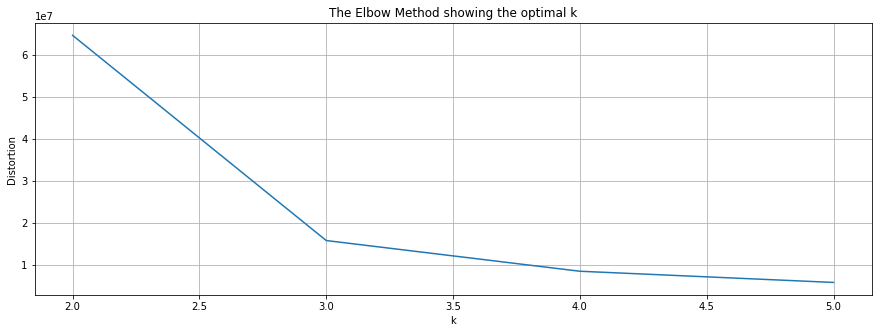

In [21]:
# clustering dataset
# determine k using elbow method
   
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = Berlin_grouped.drop('Neighborhood', 1) # <your_data>
distorsions = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 6), distorsions)
plt.grid(True)
#plt.title('Elbow curve')   
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

When K increases, the centroids are closer to the clusters centroids.
Here the distortion, mean sum of squared distances to centers, decreases to the optimum point.
The improvements will decline, at some point rapidly, creating the elbow shape.
That point is the optimal value for k. In the image above, k=3.

We run now k-means to Cluster Neighborhoods into 3 Clusters.

In [22]:
# import k-means from clustering stage
from sklearn.cluster import KMeans


# set number of clusters
kclusters = 3

Berlin_grouped_clustering = Berlin_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Berlin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Calculate the distances between feature vectore of the zipcodes and show a **Dendrogram** as a hierarchical view of possible cluster. The dendrogram plots de distances between zipcodes:

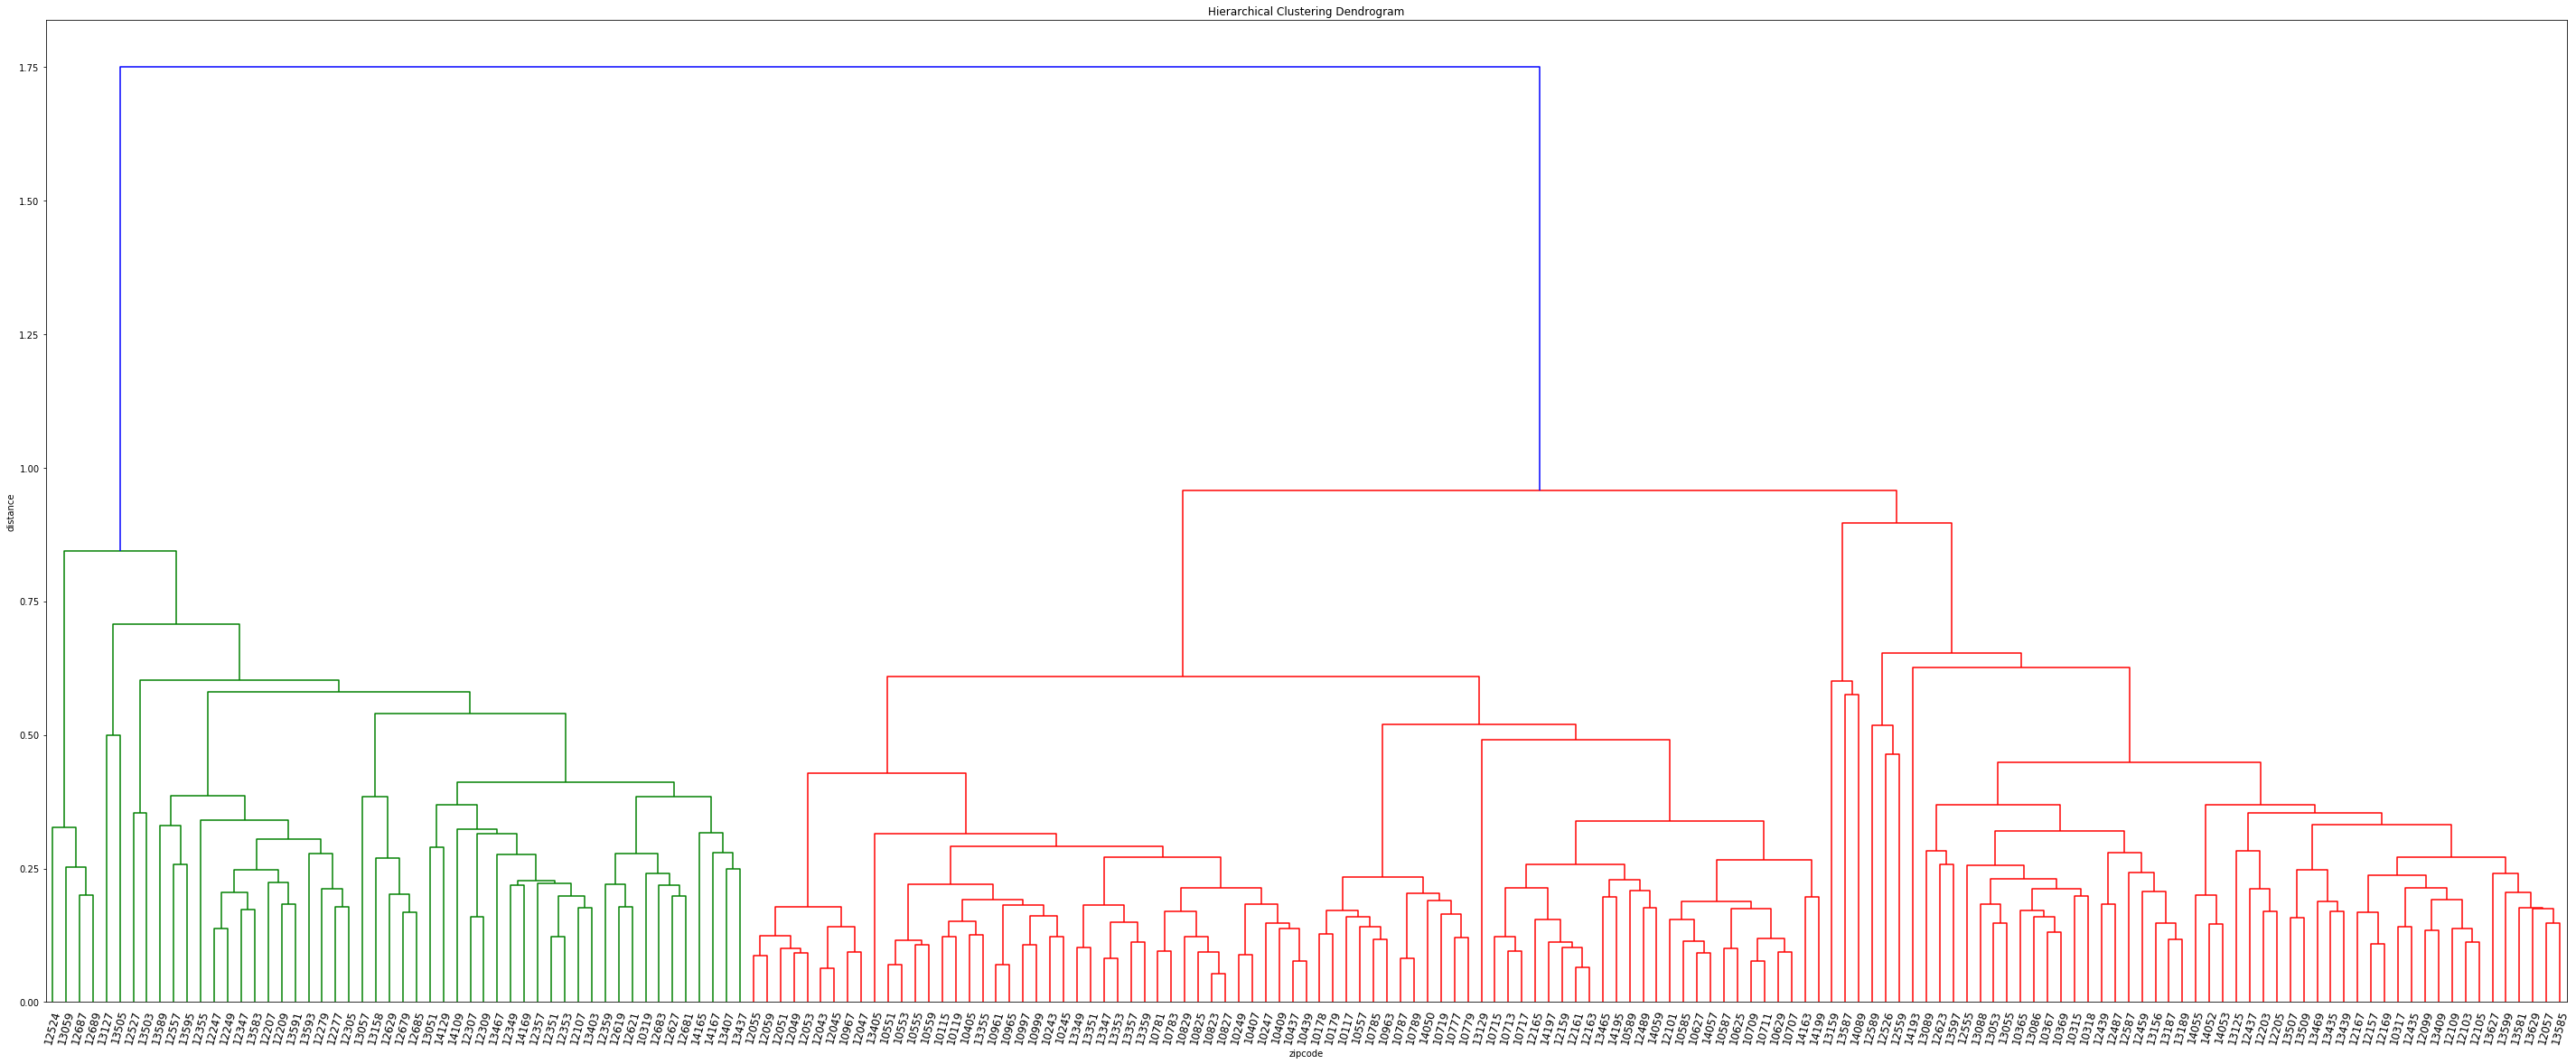

In [23]:
%matplotlib inline

Berlin_grouped_clustering = Berlin_grouped.drop('Zipcode', 1)

linkage_matrix = linkage(Berlin_grouped_clustering, 'ward')

# calculate full dendrogram
plt.figure(figsize=(50, 20))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('zipcode')
plt.ylabel('distance')

#from IPython.core.debugger import Tracer; 
# Tracer()()
dendrogram(
    linkage_matrix,
    #p=30, truncate_mode='lastp',
    labels=list ( Berlin_grouped['Zipcode']) ,
    leaf_rotation=75,  # rotates the x axis labels
    leaf_font_size=12  # font size for the x axis labels
    )

# double-click to maximize or minimize the plot
#fig = plt.gcf()
plt.show()

The dendogram shows a specific hierarchical structure. For a sparse parametrization, I use three clusters. With this number of clusters, I run the hierarchical cluster analysis to label each zipcode with a cluster-label of one to three.

In [24]:
# generate cluster labels
k=3 # number of Clusters
labels = fcluster(linkage_matrix, k, criterion='maxclust')

# add clustering labels
Berlin_merged = pd.DataFrame(Berlin_grouped.loc[:,['Zipcode']]) #i.O.
Berlin_merged['Cluster Labels'] = labels

# combine with sorted venues dataframe
Berlin_merged = Berlin_merged.join( Berlin_mapped.loc[:,['zipcode','latitude','longitude','Borough']].set_index('zipcode'), on='Zipcode').join( neighborhoods_venues_sorted.set_index('Zipcode'),on='Zipcode')

Berlin_merged.head(10)

,Zipcode,Cluster Labels,latitude,longitude,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10115,2,52.5323,13.3846,Mitte,Coffee Shop,Hotel,Art Gallery,Hostel,Restaurant,Cocktail Bar,Boutique,Bookstore,Italian Restaurant,Nightclub
1,10117,2,52.5170,13.3872,Mitte,Hotel,History Museum,Theater,Clothing Store,Monument / Landmark,Chocolate Shop,Cocktail Bar,Bookstore,Gourmet Shop,Drugstore
2,10119,2,52.5305,13.4053,Mitte,Italian Restaurant,Coffee Shop,Ice Cream Shop,Bookstore,Beer Bar,Vietnamese Restaurant,Café,Tea Room,Hotel,Burger Joint
3,10178,2,52.5213,13.4096,Mitte,Hotel,Café,Indie Movie Theater,Coffee Shop,Vietnamese Restaurant,Ice Cream Shop,Optical Shop,History Museum,Gym / Fitness Center,Gift Shop
4,10179,2,52.5122,13.4164,Mitte,Hotel,Nightclub,Coffee Shop,Restaurant,German Restaurant,Café,Italian Restaurant,Garden,Bakery,Museum
5,10243,2,52.5123,13.4394,Friedrichshain-Kreuzberg,Italian Restaurant,Vegetarian / Vegan Restaurant,Nightclub,Café,Bar,Bakery,Hotel,Hostel,Coffee Shop,Record Shop
6,10245,2,52.5007,13.4647,Friedrichshain-Kreuzberg,Café,Nightclub,Vegetarian / Vegan Restaurant,Bar,Vietnamese Restaurant,Ice Cream Shop,Gym / Fitness Center,Falafel Restaurant,Coffee Shop,Beer Garden
7,10247,2,52.5161,13.4656,Friedrichshain-Kreuzberg,Café,Pizza Place,Bar,Falafel Restaurant,Coffee Shop,Ice Cream Shop,Bakery,Vegetarian / Vegan Restaurant,Wine Bar,Bookstore
8,10249,2,52.5238,13.4428,Friedrichshain-Kreuzberg,Café,Italian Restaurant,Vietnamese Restaurant,Park,Hotel,Ice Cream Shop,Indie Movie Theater,Bar,Pizza Place,Nightclub
9,10315,3,52.5132,13.5148,Lichtenberg,Tram Station,Supermarket,Bakery,Hotel,Zoo Exhibit,Drugstore,Bus Stop,Cafeteria,Coffee Shop,Park


As the dendrogram shows for example, the zipcodes "10115", "10117" and "10119" are part of the secound-green cluster (see the zipcode in the dendrogram). This table shows in column "Cluster Labels", that three zipcodes ("10115", "10117" and "10119") are clustered into the second cluster-label, as expected.

<a id="ref3"></a>
<h2>5. RESULTS</h2>

<a id="ref25"></a>
<h1>a. Examine clusters</h1>

The following map visualizes the distribution of clustered zipcodes (based on similar venues) in Berlin:


In [25]:
Borough_Json = r'berliner-bezirke.geojson' # geojson file

# create a plain map of Berlin
location = Nominatim().geocode('Berlin, Germany') # as the center of the following map, convert the address of Toronto into latitude and longitude values

Map_Berlin_clustered = folium.Map(location=[location.latitude, location.longitude], zoom_start=10.2)


Map_Berlin_clustered.choropleth(
    geo_data=Borough_Json,
    key_on='features.properties.spatial_alias', #  PFAD im geojson JavaScript!!!!
    fill_color='YlGn', 
    legend_name='City of Berlin and clustered venues',
    highlight = True,
    line_color ='black'
)

# set color scheme for the clusters
x = np.arange(k)
ys = [i+x+(i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, clu, bor in zip(
     Berlin_merged['latitude'],
     Berlin_merged['longitude'],
     Berlin_merged['Zipcode'],
     Berlin_merged['Cluster Labels'],
     Berlin_merged['Borough']
):
    label = folium.Popup('Borough: {}, Zipcode: {}, Cluster {},  '.format(bor, poi, clu ) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[clu-1],
        fill=True,
        fill_color=rainbow[clu-1],
        fill_opacity=0.7
    ).add_to(Map_Berlin_clustered)
       
Map_Berlin_clustered

The map of the clustered locations show some geographical structure. I suggest to double-click and zoom in the map.
When we look at the map closely we briefly see that; 

*Cluster 2* (LIGHT GREEN) lie around the center of Berlin and the boroughs it encompasses together with the portions are:
Mitte (% 100), 
Friedrichshain-Kreuzberg (% 100), 
Charlottenburg Wilmersdorf (% 45), 
Tempelhof Schöneberg (% 25), 
Neuköln (% 20),  
Pankow (% 25),
Steglitz Zehlendorf (% 15)

*Cluster 3* (RED) is mainly located towards outwards of Berlin center. It lies as an outer boundry around Cluster 2.
The boroughs it encompasses together with the portions are:
Treptow-Köpenick (% 75)
Lichtenberg (% 60)
Pankow (% 40)
Reinickendorf (% 20) 
Charlottenburg-Wilmersdorf (% 20)
Spandau (% 30)
Steglitz-Zehlendorf (% 10) 

*Cluster 1* (BLUE) is mainly located more outwards from Berlin center than Cluster 3 . It lies as an outer bound around both Clusters 2 and 3.
The boroughs it encompasses together with the portions are:
Marzahn-Hellersdorf (% 90)
Lichtenberg (% 15)
Pankow (% 5)
Reinickendorf (% 45)
Spandau (% 30)
Steglitz-Zehlendorf (% 40) 
Tempelhof Schöneberg (% 35
Neuköln (% 35)
Treptow-Köpenick (% 15)
Marzahn-Hellersdorf (% 80)

#### Describe the clusters

In this section, we present the clusters and determine the venues categories that distinguish the cluster.

In [26]:
# create structure for ranked venue categories
# created columns with ranked names
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create column names according to number of top venues: "1st, 2nd, 3rd, 4th ...
columns_ranked = ['Zipcode']
for ind in np.arange(num_top_venues):
    try:
        columns_ranked.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns_ranked.append('{}th Most Common Venue'.format(ind+1))
columns_ranked


def get_ranked_venues( columns_ranked, Berlin_onehot, Clusterer_Zipcode ):
    
    # make one-hot encoding for venues in cluster
    Berlin_grouped_temp = Berlin_onehot [ Berlin_onehot['Zipcode'].isin( Clusterer_Zipcode ) ].groupby('Zipcode').mean().reset_index()
    
    # create a new dataframe with same zipcodes
    Cluster_ranked_venues = pd.DataFrame(columns=columns_ranked)
    Cluster_ranked_venues['Zipcode'] = Berlin_grouped_temp[ 'Zipcode']

    # rank venues by frequency
    for ind in np.arange(Berlin_grouped_temp.shape[0]):
        Cluster_ranked_venues.iloc[ind, 1:] = return_most_common_venues( Berlin_grouped_temp.iloc[ind, :], num_top_venues)

    return Cluster_ranked_venues


def show_popular_venues( Cluster_Label, Berlin_merged):

    # extract zipcode in cluster and get ranked venue categories by frequency 
    Cluster = Berlin_merged.loc[Berlin_merged['Cluster Labels'] == LABEL, Berlin_merged.columns[[0] + list(range(4, 14))]]
    
    # call the get_ranked_venues function
    Cluster_ranked_venues = get_ranked_venues( columns_ranked, Berlin_onehot, Cluster['Zipcode'] )

    # extract modes of ranked venues and delete nan
    top_venues  = [] 
    for row in Cluster_ranked_venues.mode(axis=0).copy().drop(columns = 'Zipcode').drop_duplicates().iterrows():
        top_venues.extend ( row[1].values )
    top_venues = [item for item in top_venues if type(item)==str]#

    # remove duplicates and order alphabetical
    top_venues = list ( sorted( set( top_venues )) )

    # show characteristic venues and survey of top ten venues of Cluster
    
    print ('Cluster{} contains {} zipcodes.\n'.format(LABEL, len( Cluster['Zipcode']) ))
    print ('The most important categories  - the modes of all top ten venues (per rank for all zipcodes in alphabetical order):\n {}'.format( top_venues) )
    print ()
    print ('Show individual top ten venues categories in cluster{}:'.format(LABEL) )
    print ()
    display ( Cluster_ranked_venues )
    return Cluster_ranked_venues, top_venues

### Results: Cluster1 (BLUE):

Cluster1 lies close to the outer boundaries of Berlin. Therefore one might expect less venes for tourism, food, coffee, or other recrational places compared to more central clusters.

In [27]:
# Clusters = list[index][properties] as data structure for custers.\
# Index-1 is the lael of a cluster, properties are: 
# cluster label number,
# a dataframe with zipcodes and venues, 
# and a set of most frequent venue categories

Clusters = []

LABEL = 1
Cluster_ranked_venues, top_venues = show_popular_venues ( LABEL, Berlin_merged )
Clusters.append ( [LABEL, Cluster_ranked_venues, top_venues ] )

Cluster1 contains 52 zipcodes.

The most important categories  - the modes of all top ten venues (per rank for all zipcodes in alphabetical order):
 ['Big Box Store', 'Bus Stop', 'Drugstore', 'Electronics Store', 'German Restaurant', 'Park', 'Supermarket']

Show individual top ten venues categories in cluster1:



,Zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10319,Supermarket,Zoo Exhibit,Drugstore,Bus Stop,Bakery,Pizza Place,Italian Restaurant,Tram Station,Dog Run,Stadium
1,12107,Supermarket,Steakhouse,Bakery,Diner,Chinese Restaurant,Bus Stop,Italian Restaurant,Hotel,Lottery Retailer,Greek Restaurant
2,12207,Supermarket,Bakery,Bus Stop,Organic Grocery,Light Rail Station,Drugstore,Hotel,Café,German Restaurant,Fast Food Restaurant
3,12209,Supermarket,Fast Food Restaurant,Drugstore,Bus Stop,Organic Grocery,Bakery,German Restaurant,Tennis Stadium,Big Box Store,Taverna
4,12247,Supermarket,Park,Bus Stop,Italian Restaurant,Drugstore,Liquor Store,Greek Restaurant,Tennis Court,Taverna,Ice Cream Shop
5,12249,Supermarket,Italian Restaurant,Bus Stop,Drugstore,History Museum,Optical Shop,Movie Theater,Fast Food Restaurant,Taverna,Park
6,12277,Supermarket,Bus Stop,Light Rail Station,Chinese Restaurant,Fast Food Restaurant,Big Box Store,Italian Restaurant,Clothing Store,Arts & Crafts Store,Tennis Court
7,12279,Supermarket,Bus Stop,Italian Restaurant,Taverna,Restaurant,Chinese Restaurant,Soccer Field,Park,Fast Food Restaurant,Recreation Center
8,12305,Supermarket,Bus Stop,Italian Restaurant,Greek Restaurant,Chinese Restaurant,Electronics Store,Organic Grocery,Taverna,Fast Food Restaurant,Big Box Store
9,12307,Supermarket,Bakery,Doner Restaurant,Soccer Field,Gas Station,Miscellaneous Shop,Mobile Phone Shop,Electronics Store,Pharmacy,Light Rail Station


The modes show the most frequent venue categories per rank over all zipcode without duplicates. The most important venue categories in this Cluster are: 'Big Box Store', 'Bus Stop', 'Drugstore', 'Electronics Store', 'German Restaurant', 'Park', 'Supermarket'. This cluster includes 52 zipcodes. When we consider overall potential clients for cabs. This cluster is not so fruitfull compared to other 2. For details see table "Top ten venue categories".

### Results: Cluster2 (LIGHT GREEN):

Cluster2 lies around the centre of Berlin. It is so evident that this cluster area includes majority of the live places or rectrational areas in Berlin. 

In [28]:
LABEL = 2
Cluster_ranked_venues, top_venues = show_popular_venues ( LABEL, Berlin_merged )
Clusters.append ( [LABEL, Cluster_ranked_venues, top_venues ] )

Cluster2 contains 93 zipcodes.

The most important categories  - the modes of all top ten venues (per rank for all zipcodes in alphabetical order):
 ['Bakery', 'Café', 'Coffee Shop', 'Ice Cream Shop', 'Italian Restaurant', 'Middle Eastern Restaurant', 'Vietnamese Restaurant']

Show individual top ten venues categories in cluster2:



,Zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10115,Coffee Shop,Hotel,Art Gallery,Hostel,Restaurant,Cocktail Bar,Boutique,Bookstore,Italian Restaurant,Nightclub
1,10117,Hotel,History Museum,Theater,Clothing Store,Monument / Landmark,Chocolate Shop,Cocktail Bar,Bookstore,Gourmet Shop,Drugstore
2,10119,Italian Restaurant,Coffee Shop,Ice Cream Shop,Bookstore,Beer Bar,Vietnamese Restaurant,Café,Tea Room,Hotel,Burger Joint
3,10178,Hotel,Café,Indie Movie Theater,Coffee Shop,Vietnamese Restaurant,Ice Cream Shop,Optical Shop,History Museum,Gym / Fitness Center,Gift Shop
4,10179,Hotel,Nightclub,Coffee Shop,Restaurant,German Restaurant,Café,Italian Restaurant,Garden,Bakery,Museum
5,10243,Italian Restaurant,Vegetarian / Vegan Restaurant,Nightclub,Café,Bar,Bakery,Hotel,Hostel,Coffee Shop,Record Shop
6,10245,Café,Nightclub,Vegetarian / Vegan Restaurant,Bar,Vietnamese Restaurant,Ice Cream Shop,Gym / Fitness Center,Falafel Restaurant,Coffee Shop,Beer Garden
7,10247,Café,Pizza Place,Bar,Falafel Restaurant,Coffee Shop,Ice Cream Shop,Bakery,Vegetarian / Vegan Restaurant,Wine Bar,Bookstore
8,10249,Café,Italian Restaurant,Vietnamese Restaurant,Park,Hotel,Ice Cream Shop,Indie Movie Theater,Bar,Pizza Place,Nightclub
9,10405,Café,Ice Cream Shop,Vietnamese Restaurant,Cocktail Bar,Wine Bar,Coffee Shop,Italian Restaurant,Beer Bar,Bar,Park


The modes show the most frequent venue categories per rank over all zipcode without duplicates. This cluster includes 80 zipcodes and all of them lie around city center. Most important venue categories in this cluster are: 'Big Box Store', 'Bus Stop', 'Drugstore', 'Electronics Store', 'German Restaurant', 'Park', 'Supermarket'. It is so evident that Cluster 2 has much more cab client potential than other Clusters. For details see table "Top ten venue categories".

### Results: Cluster 3 (RED):

Cluster3 lies between other two clusters as a pillow. It seems that this cluster has more cab client potential than cluster 1 but however less potential than cluster 2. 

In [29]:
LABEL = 3
Cluster_ranked_venues, top_venues = show_popular_venues ( LABEL, Berlin_merged )
Clusters.append ( [LABEL, Cluster_ranked_venues, top_venues ] )

Cluster3 contains 56 zipcodes.

The most important categories  - the modes of all top ten venues (per rank for all zipcodes in alphabetical order):
 ['Bakery', 'Big Box Store', 'Café', 'Chinese Restaurant', 'Drugstore', 'Greek Restaurant', 'Park', 'Supermarket']

Show individual top ten venues categories in cluster3:



,Zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10315,Tram Station,Supermarket,Bakery,Hotel,Zoo Exhibit,Drugstore,Bus Stop,Cafeteria,Coffee Shop,Park
1,10317,Supermarket,Park,Beer Garden,Bakery,Italian Restaurant,Hotel,Boat Rental,Boat or Ferry,Harbor / Marina,Café
2,10318,Supermarket,Tram Station,Organic Grocery,Light Rail Station,Bakery,Greek Restaurant,German Restaurant,Gastropub,Forest,Flower Shop
3,10365,Supermarket,Park,Vietnamese Restaurant,Hotel,Coffee Shop,Bakery,Asian Restaurant,Smoke Shop,Shopping Mall,Hardware Store
4,10367,Supermarket,Italian Restaurant,Café,Coffee Shop,Tram Station,Park,Fast Food Restaurant,Bakery,Pizza Place,Asian Restaurant
5,10369,Supermarket,Pizza Place,Hotel,Park,Vietnamese Restaurant,Bar,Tram Station,Café,Soccer Field,Nightclub
6,12057,Supermarket,Bus Stop,Bar,Bakery,Breakfast Spot,Café,Rental Car Location,Doner Restaurant,Light Rail Station,Fast Food Restaurant
7,12099,Supermarket,Café,Park,Bakery,Doner Restaurant,Italian Restaurant,Fried Chicken Joint,Drugstore,Vietnamese Restaurant,Rest Area
8,12103,Supermarket,Park,Bakery,Drugstore,Café,Italian Restaurant,Doner Restaurant,Gym / Fitness Center,Indian Restaurant,Ice Cream Shop
9,12105,Supermarket,Café,Park,Drugstore,Doner Restaurant,Bus Stop,Breakfast Spot,Shopping Mall,Gym / Fitness Center,Restaurant


The modes show the most frequent venue categories per rank over all zipcode without duplicates. This cluster includes 54 zipcodes and majority of them lie between the other two clusters (Cluster 1 and 2). Most important venue categories in this cluster are: 'Bakery', 'Big Box Store', 'Café', 'Chinese Restaurant', 'Drugstore', 'Greek Restaurant', 'Park', 'Supermarket'. It is so evident that Cluster 3 has much more cab client potential than Cluster 1 but less than Cluster 2. For details see table "Top ten venue categories".

<a id="ref25"></a>
<h1>b. Explore top rated Venues</h1>

As far as taxi business concerned, finding a pivot area may really help. But on the other hand, pinpoiting most live places within this pivot area also helps more. Therefore we "ll try to find top rated places within our most fruitfull cluster. This will facilitate our cab driver"s patrol area problem and alleviate cleint finding problem.  

In [30]:
def get_top_venue(names, latitudes, longitudes, boroughs):
    
    API_KEY= '7ck9FFncp_Txch8yQlU1SINYI3ZPBkirqsa04kEKAodHh79szVNnfxAIFvl7Yc4GAkYKO7PfYMPeUjY3F2DqgvDCZ8oGjl3yaYVpoJOOlq8QcLJK_Acu25SPXUnGW3Yx'
    
    API_HOST = 'https://api.yelp.com'
        
    SEARCH_PATH = '/v3/businesses/search'
    
    url = '{0}{1}'.format(API_HOST, quote(SEARCH_PATH.encode('utf8')))
    
    html= "<table> <tr><td rowspan='5'><a href={Url} target='_blank'><img src={Img_Url} width='100'/> </a> </td></tr>\
            <tr><td style='text-align:left;vertical-align:middle'>{Name}</td></tr>\
            <tr><td style='text-align:left;vertical-align:middle'>{Adresse}</td></tr>\
            <tr><td style='text-align:left;vertical-align:middle'>{Rating}</td></tr>\
            <tr><td style='text-align:left;vertical-align:middle'>{Kategorie}</td></tr></table>"

    url_params = {
        'latitude': 0, 
        'longitude': 0,
        'radius': 1000,
        'sort_by': 'rating',
        'limit': 3, #'attributes': 'hot_and_new',
        }

    for name, lat, lng, bor in zip(names, latitudes, longitudes, boroughs):
        try:
            url_params['latitude'] =  lat
            url_params['longitude'] = lng
            response = requests.request('GET', url, headers={'Authorization': 'Bearer %s' % API_KEY,}, params=url_params)
            results =  response.json()
            Label = '<H3>Top venues in "{}" for zipcode {}:</H3>'.format(bor, name)
            display(HTML( Label ))
            for v in results['businesses']:
                datatable='<p>'
                datatable += html.format(
                    Url = str(v['url']), 
                    Img_Url = str(v['image_url']), 
                    Name = '<b>Name:</b> ' + str(v['name']), 
                    Adresse='<b>Address:</b> ' + ', '.join(v['location']['display_address']), 
                    Rating='<b>Rating:</b> ' + str( v['rating'] ),
                    Kategorie='<b>Category:</b> ' + str(v['categories'][0]['title']) )
                display(HTML(datatable))
        except:
            print ('Yelp returned top rated venues for zip.'.format(name))
            print ()
        print('-'*40) 
    return datatable

Now I want to survey top rated venues in Cluster 2. Since Cluster 2 seems to be the best pivot area, I want to find most rated venues in this pivot area to tell more to our cab driver about his cab client finding problem. As we have mentioned and seen in the map Cluster 3 encompasses such Boroughs as: Mitte, Friedrichshain-Kreuzberg, Charlottenburg Wilmersdorf, Tempelhof Schöneberg, Neuköln, Pankow, Steglitz Zehlendorf. Therefore it is good to find most rated venues in these boroughs. For the sake of simplicity I have chosen first zipcode from each Borough.  

In [31]:
Selected_zipcodes1 = Berlin_mapped.loc[Berlin_mapped.Borough=='Mitte', :]
Selected_zipcodes1 = Selected_zipcodes1.head(1)
Selected_zipcodes1

,zipcode,state,latitude,longitude,Borough
0,10115,Berlin,52.5323,13.3846,Mitte


In [32]:
display(HTML('<H2>Survey in "Mitte" of top rated venues</H2><p>Click images to open the links!<p>'))

get_top_venue( 
    Selected_zipcodes1.loc[:,'zipcode'],
    Selected_zipcodes1.loc[:,'latitude'],
    Selected_zipcodes1.loc[:,'longitude'],
    Selected_zipcodes1.loc[:,'Borough']);

""
Name: Berlin Wall Memorial
"Address: Bernauer Str. 111 - 119, 13355 Berlin, Germany"
Rating: 5.0
Category: Museums


""
Name: Yarok
"Address: Torstr. 195, 10115 Berlin, Germany"
Rating: 4.5
Category: Syrian


""
Name: Marral
"Address: Torstr. 222, 10115 Berlin, Germany"
Rating: 4.5
Category: Middle Eastern


----------------------------------------


In [33]:
Selected_zipcodes2 = Berlin_mapped.loc[Berlin_mapped.Borough=='Friedrichshain-Kreuzberg', :]
Selected_zipcodes2 = Selected_zipcodes2.head(1)
Selected_zipcodes2

,zipcode,state,latitude,longitude,Borough
5,10243,Berlin,52.5123,13.4394,Friedrichshain-Kreuzberg


In [34]:
display(HTML('<H2>Survey in "Friedrichshain-Kreuzberg" of top rated venues</H2><p>Click images to open the links!<p>'))

get_top_venue( 
    Selected_zipcodes2.loc[:,'zipcode'],
    Selected_zipcodes2.loc[:,'latitude'],
    Selected_zipcodes2.loc[:,'longitude'],
    Selected_zipcodes2.loc[:,'Borough']);

""
Name: Rembrandt-Burger
"Address: Richard-Sorge-Str. 21, 10249 Berlin, Germany"
Rating: 4.5
Category: Burgers


""
Name: Burgermeister
"Address: Oberbaumstr. 8, 10997 Berlin, Germany"
Rating: 4.0
Category: Fast Food


""
Name: Berlin Wall - East Side Gallery
"Address: Mühlenstr. 3 - 100, 10243 Berlin, Germany"
Rating: 4.5
Category: Landmarks & Historical Buildings


----------------------------------------


In [35]:
Selected_zipcodes3 = Berlin_mapped.loc[Berlin_mapped.Borough=='Charlottenburg-Wilmersdorf', :]
Selected_zipcodes3 = Selected_zipcodes3.head(1)
Selected_zipcodes3

,zipcode,state,latitude,longitude,Borough
33,10585,Berlin,52.5152,13.3057,Charlottenburg-Wilmersdorf


In [36]:
display(HTML('<H2>Survey in "Charlottenburg-Wilmersdorf" of top rated venues</H2><p>Click images to open the links!<p>'))

get_top_venue( 
    Selected_zipcodes3.loc[:,'zipcode'],
    Selected_zipcodes3.loc[:,'latitude'],
    Selected_zipcodes3.loc[:,'longitude'],
    Selected_zipcodes3.loc[:,'Borough']);

""
Name: Saigon Today
"Address: Wilmersdorfer Str. 69, 10629 Berlin, Germany"
Rating: 4.5
Category: Vietnamese


""
Name: Karun Bistro
"Address: Pestalozzistr. 29, 10627 Berlin, Germany"
Rating: 4.5
Category: Persian/Iranian


""
Name: Schnitzelei
"Address: Röntgenstr. 7, 10587 Berlin, Germany"
Rating: 4.0
Category: Schnitzel


----------------------------------------


In [37]:
Selected_zipcodes4 = Berlin_mapped.loc[Berlin_mapped.Borough=='Tempelhof-Schöneberg', :]
Selected_zipcodes4 = Selected_zipcodes4.head(1)
Selected_zipcodes4

,zipcode,state,latitude,longitude,Borough
48,10781,Berlin,52.4936,13.3529,Tempelhof-Schöneberg


In [38]:
display(HTML('<H2>Survey in " Tempelhof-Schöneberg " of top rated venues</H2><p>Click images to open the links!<p>'))

get_top_venue( 
    Selected_zipcodes4.loc[:,'zipcode'],
    Selected_zipcodes4.loc[:,'latitude'],
    Selected_zipcodes4.loc[:,'longitude'],
    Selected_zipcodes4.loc[:,'Borough']);

""
Name: Rüyam Gemüse Kebab
"Address: Hauptstr. 133, 10827 Berlin, Germany"
Rating: 4.5
Category: Kebab


""
Name: Double Eye
"Address: Akazienstr. 22, 10823 Berlin, Germany"
Rating: 4.5
Category: Coffee & Tea


""
Name: Stagger Lee
"Address: Nollendorfstr. 27, 10777 Berlin, Germany"
Rating: 4.5
Category: Cocktail Bars


----------------------------------------


In [39]:
Selected_zipcodes5 = Berlin_mapped.loc[Berlin_mapped.Borough=='Neukölln', :]
Selected_zipcodes5 = Selected_zipcodes5.head(1)
Selected_zipcodes5

,zipcode,state,latitude,longitude,Borough
63,12043,Berlin,52.4799,13.4371,Neukölln


In [40]:
display(HTML('<H2>Survey in " Neukölln " of top rated venues</H2><p>Click images to open the links!<p>'))

get_top_venue( 
    Selected_zipcodes5.loc[:,'zipcode'],
    Selected_zipcodes5.loc[:,'latitude'],
    Selected_zipcodes5.loc[:,'longitude'],
    Selected_zipcodes5.loc[:,'Borough']);

""
Name: BBI Berlinburger International
"Address: Pannierstr. 5, 12047 Berlin, Germany"
Rating: 4.5
Category: Burgers


""
Name: Al-Andalos
"Address: Sonnenallee 40, 12045 Berlin, Germany"
Rating: 4.5
Category: Food Stands


""
Name: Klunkerkranich
"Address: Karl-Marx-Str. 66, 12043 Berlin, Germany"
Rating: 4.5
Category: Bars


----------------------------------------


For the reason of consistency, we extract trending venues at each zipcode in "Charlottenbourg-Wilmersdorf" and "Spandau":

In [41]:
Selected_zipcodes6 = Berlin_mapped.loc[Berlin_mapped.Borough=='Pankow', :]
Selected_zipcodes6 = Selected_zipcodes5.head(1)
Selected_zipcodes6

,zipcode,state,latitude,longitude,Borough
63,12043,Berlin,52.4799,13.4371,Neukölln


In [42]:
display(HTML('<H2>Survey in " Pankow " of top rated venues</H2><p>Click images to open the links!<p>'))

get_top_venue( 
    Selected_zipcodes6.loc[:,'zipcode'],
    Selected_zipcodes6.loc[:,'latitude'],
    Selected_zipcodes6.loc[:,'longitude'],
    Selected_zipcodes6.loc[:,'Borough']);

""
Name: BBI Berlinburger International
"Address: Pannierstr. 5, 12047 Berlin, Germany"
Rating: 4.5
Category: Burgers


""
Name: Al-Andalos
"Address: Sonnenallee 40, 12045 Berlin, Germany"
Rating: 4.5
Category: Food Stands


""
Name: Klunkerkranich
"Address: Karl-Marx-Str. 66, 12043 Berlin, Germany"
Rating: 4.5
Category: Bars


----------------------------------------


In [43]:
Selected_zipcodes7 = Berlin_mapped.loc[Berlin_mapped.Borough=='Steglitz Zehlendorf', :]
Selected_zipcodes7 = Selected_zipcodes5.head(1)
Selected_zipcodes7

,zipcode,state,latitude,longitude,Borough
63,12043,Berlin,52.4799,13.4371,Neukölln


In [44]:
display(HTML('<H2>Survey in " Steglitz Zehlendorf " of top rated venues</H2><p>Click images to open the links!<p>'))

get_top_venue( 
    Selected_zipcodes7.loc[:,'zipcode'],
    Selected_zipcodes7.loc[:,'latitude'],
    Selected_zipcodes7.loc[:,'longitude'],
    Selected_zipcodes7.loc[:,'Borough']);

""
Name: BBI Berlinburger International
"Address: Pannierstr. 5, 12047 Berlin, Germany"
Rating: 4.5
Category: Burgers


""
Name: Al-Andalos
"Address: Sonnenallee 40, 12045 Berlin, Germany"
Rating: 4.5
Category: Food Stands


""
Name: Klunkerkranich
"Address: Karl-Marx-Str. 66, 12043 Berlin, Germany"
Rating: 4.5
Category: Bars


----------------------------------------


<div align="right"><a href="#ToC">Return to Table of Content</a></div>
<a id="ref3e"></a>
<h2>6. DISCUSSION</h2>

<p style="text-align:justify">
    In order to recommend the best pivot area for a cab driver, cluster analysis is used in this project. Based on similarities of venues, Berlin is segmented and clustered into 3 different clusters. Since a venue is a place where people being served and spend time, those venues are always potential client sources for cab drivers. And in such a metropole like Berlin people frequently commute to or from venues. Therefore the aim of this project was to find not only the most crowded venue cluster but also to find the most top rated venues within these clusters. 
    After all one can easily say that in such a metropole, in any case, the places around city center is strongly excepted to be the best solution. And that is a solid fact and this solution can most probably be declared as valid. However with such a metropole foursquare data (12678 total venues and 394 uniques categories) it is not always easy to say top rated venues and also it is not easy to delimit a particular pivot area. 
    In addition, within the scope of this project, a methodology has been followed and with the help of a scientific approach a well known fact has been acknowledged. Finally an anticipation has come to truth. At the end of the day, we can now more powerfully state that the area around city center is the most fruitfull area as far as top rated venues and potential cab clients concerned.
    We can imitate this methodology for different metropoles and to some content may improve it. Since taxi business is very seasonal and very vulnerable to wheather conditions, implementing real time meteorological data to the analysis really contributes to the issue. In unpredicted bad wheather conditions the demand for cabs highly increases. And being in the right place in the right time requires more information. Besides, when mobility is concerned more timely data may contribute better to the problem. In another words a cab driver needs a tool showing real time people flood in such a metropole. 
    There are a lot of different things affecting cab demand in big cities. Availability of public transport is also a great variable of this topic and can be included in future variations of this analysis. 
    Yelp API is also used within the scope of this study in order to support our pivot area with top rated venues. It is also a quite necessary information for a cab driver patrolling in a determined pivot area. If he knows top rated places then he can anticipate more to find more clients around these places.     
    Kmeans algorithm as part of this clustering study. As a result of the Elbow method, 3 is found as k value. Data analysis and visual exploration is also used to see the differences between zipcodes and try to find trends with regards to most fruitfull venues. 
    Finally, offering a cluster area as a pilot does not mean that a cab driver can never find clients out of this area. There is always a chance to have client in any part of the city. But the probability of getting a client in cluster 2 is expected to be higher than the others. 

<div align="right"><a href="#ToC">Return to Table of Content</a></div>
<a id="ref3f"></a>
<h2>7. CONCLUSION</h2>

<p style="text-align:justify">
    Findings of this project illustrates how measures of data science support a systematic analysis of neighborhoods. Within the scope of this project, various data sources and analysis methods have been implemented. The results show differences in a lot of respects. A hierarchical cluster analysis classifies zipcodes into three distinct clusters. A cluster is grouped by zipcodes with  a similar structure of venues. A comparison of clusters show clear differences in the venues structures that can be related to specific areas in Berlin. 
    Moreover, in broader sense, the goal of the project is to support peoples who consider to be a cab driver in Berlin. A solution area has been delimited as a result of k-means clustering and the solution is supported with top rated venues. The next step for this project can be integration of particular data such as wheather conditions, public transport availability to the analysis data set.     
    In conclusion cluster 2 is recommended to be the solution pivot area. It includes Mitte, Friedrichshain-Kreuzberg, Charlottenburg Wilmersdorf , Tempelhof Schöneberg, Neuköln , Pankow , Steglitz Zehlendorf boroughs and encompasses the city center. This part of city of Berlin is full of recreational areas and torustic sites, including the famous "Berlin Wall". The second alternative is found to be the next circular area around cluster 2. That is Cluster 3 and the last one is Cluster 1. When we look at the number of zipcodes within each cluster we observe similar trend. Cluster 2 has 80, Cluster 3 has 54 and Cluster 1 has 52 zipcodes.
    In conclusion, I recommend cab drivers in Berlin to use Cluster 2 area to catch clients or passengers by paying more ettention to the top rated areas within this cluster. And hope the best for them.       